# Comptage photometrique

- auteur : Sylvie Dagoret-Campagne
- date de creation : 8 juin 2021
- affiliation : IJCLab/IN2P3/CNRS


## Import


In [151]:
import os
from astropy import constants as const

In [152]:
#from astropy import physical_constants, astronomical_constants

In [153]:
from astropy import units as u

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
import pysynphot as S

In [156]:
NBBANDS = 6
band_to_number = {'u':0,'g':1,'r':2,'i':3,'z':4,'y4':5}
band_to_number_2 = {'u':0,'g':1,'r':2,'i':3,'z':4,'y':5}
number_to_band = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y4'}
number_to_band_2 = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}
filtercolor = ['blue','green','red','orange','grey','black']
NBCOLORS=NBBANDS-1
number_to_color = {0:'U-G',1:'G-R',2:'R-I',3:'I-Z',4:'Z-Y'}
color_to_number = {'U-G':0,'G-R':1,'R-I':2,'I-Z':3,'Z-Y':4}
mpl_colors_col = ['b','g','r','y','grey','k']

WLMIN = 3000. # Minimum wavelength : PySynPhot works with Angstrom
WLMAX = 11000. # Minimum wavelength : PySynPhot works with Angstrom

NBINS = int(WLMAX-WLMIN) # Number of bins between WLMIN and WLMAX
BinWidth = (WLMAX-WLMIN)/float(NBINS) # Bin width in Angstrom
WL = np.linspace(WLMIN,WLMAX,NBINS)   # Array of wavelength in Angstrom

# LSST collectif surface
Deff = 642.3 # effective radius in cm
Seff = np.pi*Deff**2/4  # in cm2
S.refs.setref(area = Seff, waveset=None) # set by default to 6.4230 m2
S.refs.set_default_waveset(minwave = WLMIN, maxwave = WLMAX, num = NBINS, delta = BinWidth, log = False)
S.refs.showref()

EXPOSURE=30.0 # seconds
gel=1  # phe/ADU

pysynphot_root_path = os.environ['PYSYN_CDBS']
path_sed_calspec = os.path.join(pysynphot_root_path,'calspec')

#flatsp = S.FlatSpectrum(10, fluxunits='photlam')
#flatsp.convert('photlam')
#flatsp_norm = flatsp.renorm(10, 'vegamag', S.ObsBandpass('johnson,v'))
#nbr_filters = 7

graphtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/14l1632sm_tmg.fits
 comptable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/16n1832tm_tmc.fits
thermtable: /Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs/mtab/tae17277m_tmt.fits
      area: 324015.4546769212
   waveset: Min: 3000.0, Max: 11000.0, Num: None, Delta: 1.0, Log: False


# Flux


Par définition le flux de réference donnant une magnitude AB nulle est
$$
F_{ref} = 3631.1 Jy 
$$

avec
$$
1 Jy = 10^{-26} W.Hz^{-1}.m^{-2} = 10^{-23}.erg.cm^{-2} s^{-1} . Hz^{-1}
$$

## Flux de référence

In [157]:
# Conversion de 1Jy en W/Hz/m2 et on divise par 1O^0.4*25 (unite de 25 mag)
# Calcul dans le SI
K0=3631.1*1e-26*np.power(10,-10.)
K0 # W/Hz/m2

3.6311e-33

In [158]:
# Pour une surface collectrice correspondant à D=6.5 m et Delta t = 30 sec
# K1 est le terme de photoelectrons produits par le CCD pendant Delta T= 30 secondes
# Calcul dans le SI
K1=K0*np.pi*6.5**2/4*30./6.626e-34
K1 # photoelectrons dans une exposition de 30 seconde dans le telescope de Diametre effectif de 6.5 m

5455.375228093965

# Paths

In [159]:
path_atmosphere="../../atmosphere/RT_MPL_pp_us_sa_rtvis_z12_wv40_oz30_cld0000.OUT"
path_throughtput="../../throughput/lsst_throughput.csv"

# Charge configuration

##  Bruit de fond de ciel

In [160]:
sky_background_mag=[22.92,22.27,21.20,20.47,19.59,18.64]
fwhm_seeing_arcsec=[.77,.73,.7,0.67,0.65,0.63]

## Atmosphere

In [161]:
data_atm=np.loadtxt(path_atmosphere)

In [162]:
wl=data_atm[:,0]
trans=data_atm[:,1]
bp_atm = S.ArrayBandpass(wl*10, trans, name = "atmosphere")

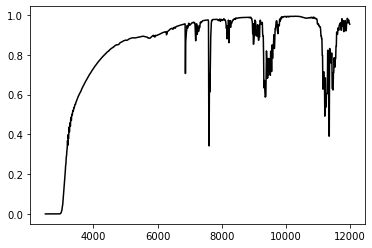

In [163]:
fig,ax= plt.subplots()
wl=bp_atm.wave
tr=bp_atm.throughput
ax.plot(wl,tr,color=filtercolor[index])

## Filtres

In [164]:
df_lsst = pd.read_csv(path_throughtput, index_col=0)
df_lsst

,wl,u,g,r,i,z,y
0,300,0.000711,0.000000,0.000000,0.000034,0.000000,0.000000
1,301,0.000440,0.000000,0.000000,0.000155,0.000000,0.000000
2,302,0.000591,0.000000,0.000000,0.000072,0.000000,0.000000
3,303,0.000022,0.000000,0.000000,0.000034,0.000000,0.000000
4,304,0.000229,0.000000,0.000000,0.000034,0.000000,0.000000
...,...,...,...,...,...,...,...
896,1196,0.000029,0.000298,0.000088,0.000121,0.000560,0.016426
897,1197,0.000024,0.000357,0.000084,0.000150,0.000630,0.016413
898,1198,0.000016,0.000427,0.000080,0.000187,0.000711,0.016397
899,1199,0.000012,0.000501,0.000076,0.000235,0.000802,0.016303


In [165]:
bp_filter = []

for index in np.arange(6) :
    filter_name=number_to_band_2[index]
    bp = S.ArrayBandpass(df_lsst["wl"].values*10, df_lsst[filter_name].values, name = filter_name)                      
    bp_filter.append(bp)
    

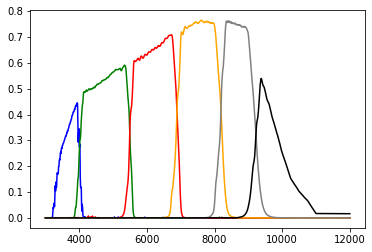

In [166]:
fig,ax=fig, ax = plt.subplots()
for index in np.arange(6) :
    wl=bp_filter[index].wave
    tr=bp_filter[index].throughput
    ax.plot(wl,tr,color=filtercolor[index])

In [167]:
bp_atm_filter = []

for index in np.arange(6) :
    bp=bp_filter[index]*bp_atm
    bp_atm_filter.append(bp)

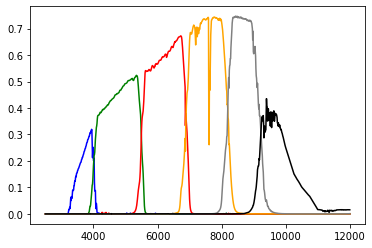

In [168]:
fig,ax=fig, ax = plt.subplots()
for index in np.arange(6) :
    wl=bp_atm_filter[index].wave
    tr=bp_atm_filter[index].throughput
    ax.plot(wl,tr,color=filtercolor[index])

# Tables de LSST

## $T_b$

In [169]:
all_Tb = []
for index in np.arange(6) :
    wl=bp_atm_filter[index].wave
    tr=bp_atm_filter[index].throughput
    
    Tb=np.trapz(tr/wl,x=wl)
    all_Tb.append(Tb)
all_Tb

[0.041773818421693934,
 0.14235168919627506,
 0.13704642378129755,
 0.12438447622919174,
 0.08658012175563427,
 0.043967059336345926]

## $\Sigma_b$

In [170]:
all_Sigmab = []
for index in np.arange(6) :
    wl=bp_filter[index].wave
    tr=bp_filter[index].throughput
    
    Sigmab=np.trapz(tr/wl,x=wl)
    all_Sigmab.append(Sigmab)
all_Sigmab

[0.06519157490141832,
 0.17009085002267596,
 0.1501499334793502,
 0.13221588235448126,
 0.09018652398454385,
 0.049794460496103685]

## $k_batm$

In [171]:
kb_atm = []
for index in np.arange(6):
    Tb=all_Tb[index]
    Sb=all_Sigmab[index]
    kbatm = -2.5*np.log10(Tb/Sb)
    kb_atm.append(kbatm)
kb_atm

[0.48321824554111936,
 0.19329581628624737,
 0.09914359249248905,
 0.06629361479642462,
 0.04430864057714159,
 0.13513402947853664]

## $\lambda_{eff}$

In [172]:
all_lambda_eff = []

for index in np.arange(6):
    wl=bp_filter[index].wave
    Ssyst=bp_filter[index].throughput
    Ssyst_wl = Ssyst*wl
    
    numerator=np.trapz(Ssyst_wl,x=wl)
    denominator=np.trapz(Ssyst,x=wl)
    lambda_eff= numerator/denominator
    
    all_lambda_eff.append(lambda_eff)
    
all_lambda_eff    

[3716.7491938466355,
 4782.948637112553,
 6217.153549377707,
 7540.571056491716,
 8685.833465407366,
 9786.031472947054]

## $A_b$

In [173]:
all_Ab = []

for index in np.arange(6):
    wl=bp_filter[index].wave
    Ssyst=bp_filter[index].throughput
    Ssyst_max=np.max(Ssyst)  
    indexes=np.where(Ssyst>0.05*Ssyst_max)[0]
    lambda_B=wl[indexes[0]]
    lambda_R=wl[indexes[-1]]
    D_Lambda=lambda_R-lambda_B
    Sum=np.trapz(Ssyst,x=wl)
    Ab=Sum/D_Lambda
    all_Ab.append(Ab)
all_Ab    

[0.2774047183908046,
 0.47158079824561405,
 0.5596892349397591,
 0.5988297259036144,
 0.5394048827586208,
 0.24537507575757575]

## Nombre de photoelectrons de Bruit de fond de ciel 

- On calcule par pixel. Or une source est typiquement sur 5 x 5 pixels.

In [174]:
picScale = 0.2 # arcsec per pixel

In [175]:
all_Bb = []
dt=1.0
for index in np.arange(6): 
    mb_sky = sky_background_mag[index]
    Sigmab = all_Sigmab[index]
    # nombre d'ADU donc nombre de photo-electrons
    Bb=K1/gel*(Deff/6.5)**2*dt/EXPOSURE*(picScale/1.0)**2*np.power(10,0.4*(25.0-mb_sky))*Sigmab     
    all_Bb.append(Bb)
all_Bb=np.array(all_Bb)
all_Bb # electrons par pixel par seconde

array([  31448.79195701,  149311.56454233,  353132.45916208,
        609110.5508724 ,  934445.85754036, 1237637.68841431])

## Source Count de magnitude 25

In [176]:
all_Cb = []
mb=25
dt=1.0
for index in np.arange(6): 
    Tb = all_Tb[index]
    # nombre d'ADU donc nombre de photo-electrons
    Cb=K1/gel*(Deff/6.5)**2*dt/EXPOSURE*np.power(10,0.4*(25.0-mb))*Tb     
    all_Cb.append(Cb)
all_Cb=np.array(all_Cb)
all_Cb  #  electrons par seconde

array([ 74174.85021479, 252763.94696234, 243343.75789719, 220860.82244648,
       153734.27197805,  78069.23484315])

## Signal sur bruit 